<a href="https://colab.research.google.com/github/DivyeshPanchalDP/HandsignRecognitionCNN/blob/main/Hand_SignRecgnitionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! python --version

! unzip /content/images.zip


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import os
import tensorflow as tf
import numpy as np


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=150, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(units=6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=12.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.15,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('/content/images/train',
                                                 target_size=(256, 256),
                                                 color_mode='grayscale',
                                                 batch_size=8,
                                                 classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                                 class_mode='categorical')

val_datagen = val_datagen.flow_from_directory('/content/images/test',
                                              target_size=(256, 256),
                                              color_mode='grayscale',
                                              batch_size=8,
                                              classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                              class_mode='categorical')

test_gen = test_datagen.flow_from_directory('/content/images/test',
                                            target_size=(256, 256),
                                            color_mode='grayscale',
                                            batch_size=8,
                                            classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                            class_mode='categorical')
#callbacks_list = [EarlyStopping(monitor='val_loss', patience='10'),
#                  ModelCheckpoint(filepath='model_6cat_2.h6', monitor='val_loss', save_best_only=True)]




Found 9081 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


In [3]:
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 128)       7

In [9]:
history = model.fit(training_set,
                    steps_per_epoch=15,
                    epochs=100,
                    validation_data=test_gen,
                    validation_steps=10,
                    verbose=1,
                    callbacks=callbacks
                    )



Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 1.1342 - accuracy: 0.4750
Epoch 00001: val_loss improved from 1.01115 to 0.89945, saving model to my_best_model.hdf5
15/15 [==============================] - 2s 119ms/step - loss: 1.1342 - accuracy: 0.4750 - val_loss: 0.8994 - val_accuracy: 0.6250
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 1.1926 - accuracy: 0.4750
Epoch 00002: val_loss improved from 0.89945 to 0.88313, saving model to my_best_model.hdf5
15/15 [==============================] - 2s 114ms/step - loss: 1.1926 - accuracy: 0.4750 - val_loss: 0.8831 - val_accuracy: 0.6375
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 1.0232 - accuracy: 0.5833
Epoch 00003: val_loss improved from 0.88313 to 0.83603, saving model to my_best_model.hdf5
15/15 [==============================] - 2s 115ms/step - loss: 1.0232 - accuracy: 0.5833 - val_loss: 0.8360 - val_accuracy: 0.6875
Epoch 4/100
15/15 [==============================

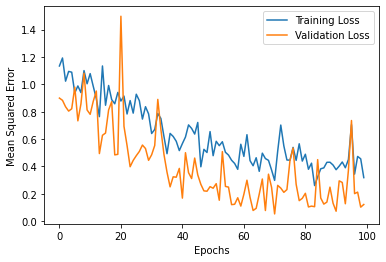

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()

In [11]:
x_test, y_test = [], []
for ibatch, (x, y) in enumerate(test_gen):
    x_test.append(x)
    y_test.append(y)
    ibatch += 1
    if ibatch == 5 * 28:
        break
# Concatenate everything together
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])
# E Get the predictions from the model and calculate the accuracy
y_pred = np.int32([np.argmax(r) for r in model.predict(x_test)])
match = (y_test == y_pred)
print('Testing Accuracy-%.2f%%' % (np.sum(match) * 100 / match.shape[0]))


Testing Accuracy-96.79%
